# Geocoding in Geopandas
Lesson at https://automating-gis-processes.github.io/CSC18/lessons/L3/geocoding.html

In [16]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode
import matplotlib.pyplot as plt

In [7]:
# Read the data into a Pandas DataFrame
data = pd.read_csv("Data/addresses.txt", sep=';')
data.head()
data.shape

(34, 2)

Now we geocode the addresses, i.e., for each address look up a coordinate point. This can be accomplished using a range of third-part services, many of which need a licence, or API access key. GeoPandas provides access to these (e.g., Google, Baidu, Bing, ArcGIS, MapQuest). * Nominatim * is a geocoder that based on openstreetmap that does not require and API, but is rate-limited

In [9]:
# Geocode the DataFrame address column
# Note: needed to set the timeout to longer than 1s
geo = geocode(data['addr'], provider='nominatim', timeout=2)
geo.head()

,address,geometry
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.9155624 60.1632015)
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.9316914 60.1690222)
2,"Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",POINT (24.94244049213 60.16988445)
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",POINT (24.9654618 60.2009041)
4,"Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",POINT (24.9216003 60.1566475)


In [11]:
# Now join the geo DataFrame with the original DataFrame of addresses
dataGeo = geo.join(data)
dataGeo.head()

,address,geometry,id,addr
0,"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",POINT (24.9155624 60.1632015),1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",POINT (24.9316914 60.1690222),1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,"Citycenter, 8, Kaivokatu, Keskusta, Kluuvi, Et...",POINT (24.94244049213 60.16988445),1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,"1, Hermannin rantatie, Hermanninmäki, Hermanni...",POINT (24.9654618 60.2009041),1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,"Hesburger Jätkäsaari, 9, Tyynenmerenkatu, Jätk...",POINT (24.9216003 60.1566475),1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [14]:
# Save to a shapefile
dataGeo.to_file("Data/addresses.shp")

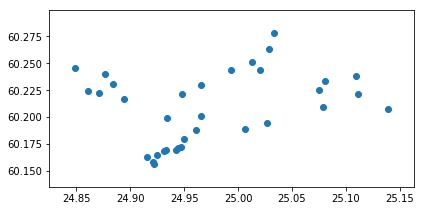

In [17]:
# Plot the addresses
%matplotlib inline
dataGeo.plot()
plt.tight_layout()